# Multiple Regression for House Price Prediction Dataset

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv('Z:\Z-drive\sem5\MLlab\Dataset\House.csv')

In [48]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [49]:
dfTrain=df.head(int(len(df)*2/3))
dfTest=df.tail(int(len(df)/3))

In [64]:
corr = dfTrain.corr()
print(corr)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.348614   0.524777     0.717427  0.079625  0.252647   
bedrooms       0.348614  1.000000   0.551828     0.608080  0.072376  0.165206   
bathrooms      0.524777  0.551828   1.000000     0.754120  0.114624  0.486004   
sqft_living    0.717427  0.608080   0.754120     1.000000  0.209379  0.328596   
sqft_lot       0.079625  0.072376   0.114624     0.209379  1.000000  0.013773   
floors         0.252647  0.165206   0.486004     0.328596  0.013773  1.000000   
waterfront     0.274837 -0.008749   0.079393     0.130053  0.012214  0.021106   
view           0.405194  0.130209   0.219598     0.340476  0.061096  0.031004   
condition      0.043524  0.030485  -0.126047    -0.062093 -0.004854 -0.291579   
sqft_above     0.616158  0.499877   0.690488     0.871790  0.216204  0.519829   
sqft_basement  0.353625  0.340043   0.294546     0.469576  0.037638 -0.266279   
yr_built       0.033648  0.1

In [51]:
# ind=['sqft_lot','floors','bedrooms','sqft_above','sqft_basement','condition']
ind=['sqft_lot','floors','bedrooms','sqft_above','sqft_basement','waterfront','view','yr_built','yr_renovated','condition']

In [52]:
x=[]
for i in range(len(dfTrain)):
    temp=[]
    temp.append(1)
    for j in ind:
        temp.append(dfTrain[j][i])
    x.append(temp)
Y=dfTrain['price']
Y=np.array(Y)

X=np.array(x)
Xt=np.transpose(X)
XtX=Xt.dot(X)
XtXi=np.linalg.inv(XtX)
XtY=Xt.dot(Y)
W=XtXi.dot(XtY)

In [53]:
for i in range(len(W)):
    print("w"+str(i)+" : "+str(W[i]))

w0 : 4661425.614373386
w1 : -0.7598202030283314
w2 : 71732.53228891268
w3 : -50396.77675105212
w4 : 313.8244064770065
w5 : 276.42641437004386
w6 : 613350.0186709971
w7 : 54223.99382514111
w8 : -2446.0603058150155
w9 : 5.905975070880231
w10 : 32600.806285675615


# Avg performance measures

In [54]:
Ypred = []
for i in range(len(dfTrain)):
    sum=W[0]
    for j in range(len(ind)):
        sum+=W[j+1]*dfTrain[ind[j]][i]
    Ypred.append(sum)

In [55]:
SSE=0
Ybar=0
for i in range(len(Y)):
    SSE+=(Y[i]-Ypred[i])**2
    Ybar+=Y[i]
Ybar/=len(Y)
SST=0
for i in range(len(Y)):
    SST+=(Y[i]-Ybar)**2
SSR=SST-SSE
Rsq=SSR/SST
AdjRsq=1-((1-Rsq)*(len(X)-1)/(len(X)-len(ind)-1))

In [56]:
print("SSR : ",SSR)
print("SSE : ",SSE)
print("SST : ",SST)
print("Rsq : ",Rsq)
print("AdRq: ",AdjRsq)

SSR :  265319452366638.66
SSE :  167866834602037.34
SST :  433186286968676.0
Rsq :  0.6124834980887197
AdRq:  0.6112150316340184


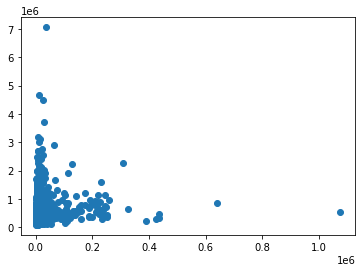

In [57]:
x1=[]
for i in range(len(X)):
    x1.append(x[i][1])
print(plt.scatter(x1,Y))

# Testing set

In [58]:
dfTest.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3067,6/23/2014 0:00,649950.0,3,2.50,1500,1375,2.0,0,0,3,1200,300,2014,0,2811 14th Ave W,Seattle,WA 98119,USA
3068,6/23/2014 0:00,458500.0,3,2.00,1890,1599,2.0,0,0,3,1430,460,2012,1912,6539 41st Ave SW,Seattle,WA 98136,USA
3069,6/23/2014 0:00,500000.0,3,1.00,1150,5100,2.0,0,0,3,1150,0,1911,2005,3947 SW Austin St,Seattle,WA 98136,USA
3070,6/23/2014 0:00,362300.0,3,2.50,2430,15264,2.0,0,0,3,2430,0,1997,0,9226 S 247th Pl,Kent,WA 98030,USA
3071,6/23/2014 0:00,324000.0,4,1.75,2110,7208,1.0,0,0,3,1170,940,1975,0,17403 159th Ave SE,Renton,WA 98058,USA


In [59]:
price=[]
for i in range(len(dfTest)):
    sum=W[0]
    for j in range(len(ind)):
        sum+=W[j+1]*dfTest[ind[j]][i+3067]
    price.append(sum)


In [60]:
Y=[]
for i in range(len(dfTest)):
    Y.append(dfTest['price'][i+3067])

In [63]:
for i in range(len(Y)):
    print(str(Y[i])+"\t"+str(price[i]))

649950.0	283609.7709478969
458500.0	416031.7559584916
500000.0	445945.98757281475
362300.0	617715.7490025964
324000.0	419942.9555929713
495000.0	996798.8190400556
233500.0	411635.78303877823
479000.0	611177.3318688236
322200.0	519088.1662662942
835000.0	754454.2008222291
347000.0	301738.32393529033
725000.0	444514.490847758
345000.0	481373.3301000362
345950.0	545329.3773594284
550000.0	479601.6026871586
399950.0	436380.94349103706
269500.0	440086.9049112351
494000.0	393769.64817842655
453000.0	497508.31081802584
442500.0	329483.787729178
235000.0	316091.4428151401
389800.0	479933.30994427926
346000.0	299611.3546035574
360000.0	387119.8941560099
650000.0	592904.223381901
290000.0	346872.08306379477
234000.0	261191.57435894897
260000.0	435393.31607079227
349900.0	662337.2177353445
275000.0	272032.76237793174
725000.0	900323.3907628097
375000.0	426486.1095247249
806000.0	372268.927394975
470000.0	547426.6304080393
490000.0	343356.2309100041
615000.0	602040.0756155308
249000.0	177027.38261